## Inicializando

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

import sys
funcoes_path = os.getenv('funcoes_path')
sys.path.append(funcoes_path)

import datagen
import pypsg

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

psg = pypsg.PSG(server_url='https://psg.gsfc.nasa.gov/api.php', timeout_seconds = 20)

Testing connection to PSG at https://psg.gsfc.nasa.gov/api.php ...
Connected to PSG with success.


## Criando parâmetros aleatórios

In [3]:
# Chamadas de API do PSG são limitadas por 100/dia
# Veja documentação do PSG: https://psg.gsfc.nasa.gov/help.php#handbook
caminho = '/home/sarah/Documentos/PSGCode'
datagen.gerar_conjunto_dados(psg = psg, n_planetas = 10, datagen_dir = caminho, 
                             nome_arquivo = 'datagen', quer_nuvem = False, 
                             verbose = True)


***** MODO DE GERAÇÃO DE DADOS *****
> Gerando exoplaneta 1/10...
> Gerando exoplaneta 2/10...
> Gerando exoplaneta 3/10...
> Gerando exoplaneta 4/10...
> Gerando exoplaneta 5/10...
> Gerando exoplaneta 6/10...
> Gerando exoplaneta 7/10...
> Gerando exoplaneta 8/10...
> Gerando exoplaneta 9/10...
> Gerando exoplaneta 10/10...
> Salvando arquivo...
***** Arquivo salvo com sucesso! *****


In [4]:
dados = caminho + '/data/datagen.parquet'
dados = pd.read_parquet(dados)
dados.head()

,OBJECT,OBJECT-NAME,OBJECT-DATE,OBJECT-DIAMETER,OBJECT-GRAVITY,OBJECT-GRAVITY-UNIT,OBJECT-STAR-DISTANCE,OBJECT-STAR-VELOCITY,OBJECT-SOLAR-LONGITUDE,OBJECT-SOLAR-LATITUDE,...,ATMOSPHERE-AEROS,ATMOSPHERE-ATYPE,ATMOSPHERE-AABUN,ATMOSPHERE-AUNIT,ATMOSPHERE-ASIZE,Wave/freq [um],Total [I/F apparent albedo],Noise,Stellar,Planet
0,Exoplanet,exo0,2017/12/22 15:09,14638.112822227711,6.0860107306530535,g,2.120996715998117,0.0,-141.25054251882267,-42.74218837282513,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.0099477454, 0.011785282, 0.01169601, 0.0087...","[0.0162526, 0.016296, 0.016259, 0.0161957, 0.0...","[0.187941, 0.187941, 0.187941, 0.187941, 0.187...","[0.00994775, 0.0117853, 0.011696, 0.00871027, ..."
0,Exoplanet,exo1,2017/12/22 15:09,18384.748256587893,6.919880502091195,g,0.3939715023742402,0.0,-232.32893075818984,39.002218336872915,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.010903198, 0.012694773, 0.013264537, 0.0118...","[42.4385, 40.9343, 39.2214, 37.5968, 36.0553, ...","[1.90298, 1.90298, 1.90298, 1.90298, 1.90298, ...","[0.0109032, 0.0126948, 0.0132645, 0.0118624, 0..."
0,Exoplanet,exo2,2017/12/22 15:09,17984.58571012321,6.7955519543781016,g,2.013173536332947,0.0,45.92543184770409,85.56171837364184,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.00095259441, 0.0012235562, 0.0012484535, 0....","[0.00271193, 0.0027025, 0.00268135, 0.00265781...","[0.112169, 0.112169, 0.112169, 0.112169, 0.112...","[0.000952594, 0.00122356, 0.00124845, 0.000907..."
0,Exoplanet,exo3,2017/12/22 15:09,17164.950650547624,6.6985473621963045,g,1.2395301537754362,0.0,20.752708548956434,-14.272813379900484,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.026555645, 0.02977591, 0.030808375, 0.02838...","[0.00563607, 0.00564932, 0.00561376, 0.0055382...","[0.046681, 0.046681, 0.046681, 0.046681, 0.046...","[0.0265556, 0.0297759, 0.0308084, 0.0283888, 0..."
0,Exoplanet,exo4,2017/12/22 15:09,17558.12990758258,6.713079372922315,g,0.8410058254401963,0.0,-167.37271427519755,-81.88280243382353,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.0051413488, 0.0057123499, 0.005560986, 0.00...","[0.0566819, 0.0557186, 0.0545127, 0.0533383, 0...","[0.0207106, 0.0207106, 0.0207106, 0.0207106, 0...","[0.00514135, 0.00571235, 0.00556099, 0.0044399..."


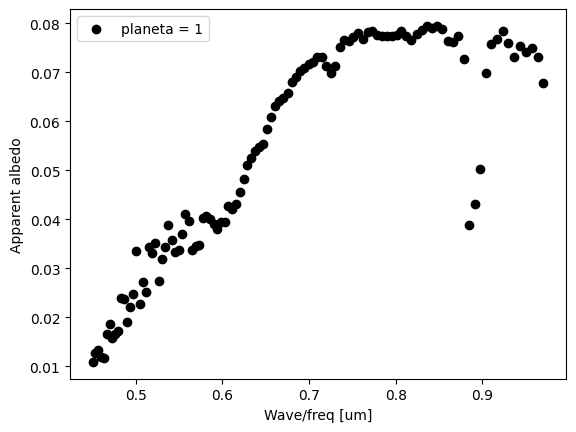

In [113]:
idx = np.random.randint(0, 10)
wave_freq = dados.iloc[idx]['Wave/freq [um]']
total_albedo = dados.iloc[idx]['Total [I/F apparent albedo]']

plt.scatter(wave_freq, total_albedo, label = f'planeta = {idx}', c = 'k')
plt.xlabel('Wave/freq [um]'); plt.ylabel('Apparent albedo')
plt.legend()
plt.show()

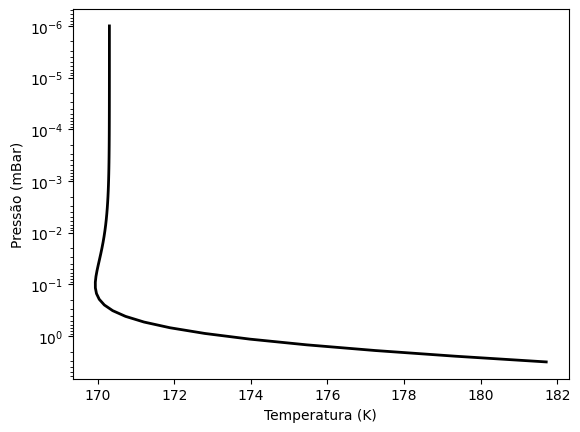

In [114]:
pressoes = []
temperaturas = []

for i in range(60):
    layer_data = dados.iloc[idx][f'ATMOSPHERE-LAYER-{i+1}']
    pressao, temperatura = layer_data.split(',')[:2]
    pressoes.append(float(pressao))
    temperaturas.append(float(temperatura))

plt.plot(temperaturas, pressoes, lw = 2, c = 'k')
plt.ylabel('Pressão (mBar)'); plt.xlabel('Temperatura (K)')
plt.gca().invert_yaxis()
plt.yscale('log')
plt.show()

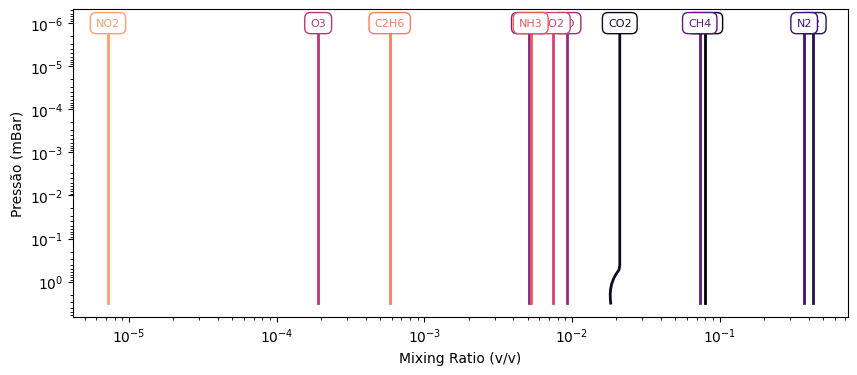

In [115]:
moleculas = dados.iloc[idx]['ATMOSPHERE-LAYERS-MOLECULES'].split(',')
mixing_ratios = [[] for _ in range(len(moleculas))]

cmap = plt.get_cmap('magma')
cores = [cmap(i) for i in np.linspace(0, 0.8, len(moleculas))]

for i in range(60):
    layer_data = dados.iloc[idx][f'ATMOSPHERE-LAYER-{i+1}']
    mixing_values = layer_data.split(',')[2:]
    for j, value in enumerate(mixing_values):
        mixing_ratios[j].append(float(value))

plt.figure(figsize = (10, 4))

for i, mol in enumerate(moleculas):
    plt.loglog(mixing_ratios[i], pressoes, label=f'{mol}', color=cores[i], lw = 2)
    plt.text(mixing_ratios[i][-1], pressoes[-1], mol, color=cores[i], va='center', ha='center',
             bbox=dict(facecolor='white', edgecolor=cores[i], boxstyle='round,pad=0.5'),
             fontsize = 8)

plt.ylabel('Pressão (mBar)'); plt.xlabel('Mixing Ratio (v/v)')
plt.gca().invert_yaxis()
plt.show()